<div style="background: radial-gradient(circle, #84fab0, #8fd3f4); color: #2c3e50; padding: 20px; border-radius: 15px; font-size: 30px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2); text-align: center; border: 1px solid #2c3e50; position: relative;">
    --PRCP-1016-HeartDieseasePred--
    <span style="position: absolute; bottom: 10px; right: 15px; font-size: 16px; color: #2c3e50;"</span>
</div>


In [165]:
import pickle   
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE  
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score,classification_report

import warnings
warnings.filterwarnings('ignore')

In [4]:
df1 = pd.read_csv(r"C:\Users\pooji\DS-project\PRCP-1016-HeartDieseasePred\PRCP-1016-HeartDieseasePred\Data\values.csv")

In [6]:
df1.shape

(180, 14)

In [8]:
df2 = pd.read_csv(r"C:\Users\pooji\DS-project\PRCP-1016-HeartDieseasePred\PRCP-1016-HeartDieseasePred\Data\labels.csv")

In [10]:
df2.shape

(180, 2)

<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow:  0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid  #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li>Keeps only rows where the key column (e.g., ID) is present in both datasets. Best when you only need records that exist in both datasets.</li>
    </ul>
</div>iv>


In [13]:
df = pd.merge(df1, df2, on='patient_id', how='inner')  # Options: 'inner', 'left', 'right', 'outer'

In [15]:
df.shape

(180, 15)

In [17]:
df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [19]:
df=df.drop(columns=['patient_id'],axis=1)

In [21]:
df.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


<div style="background-color: #f0f8ff; color: #005f73; padding: 10px; border-radius: 5px;font-size: 40px;">
   Data Preprocessin & Data Cleaning.
</di>


In [24]:
df.isnull().sum()

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [26]:
df.duplicated().sum()

0

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    object 
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    int64  
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
slope_of_peak_exercise_st_segment,180.0,1.550000,0.618838,1.0,1.00,1.0,2.00,3.0
resting_blood_pressure,180.0,131.311111,17.010443,94.0,120.00,130.0,140.00,180.0
chest_pain_type,180.0,3.155556,0.938454,1.0,3.00,3.0,4.00,4.0
num_major_vessels,180.0,0.694444,0.969347,0.0,0.00,0.0,1.00,3.0
fasting_blood_sugar_gt_120_mg_per_dl,180.0,0.161111,0.368659,0.0,0.00,0.0,0.00,1.0
resting_ekg_results,180.0,1.050000,0.998742,0.0,0.00,2.0,2.00,2.0
serum_cholesterol_mg_per_dl,180.0,249.211111,52.717969,126.0,213.75,245.5,281.25,564.0
oldpeak_eq_st_depression,180.0,1.010000,1.121357,0.0,0.00,0.8,1.60,6.2
sex,180.0,0.688889,0.464239,0.0,0.00,1.0,1.00,1.0
age,180.0,54.811111,9.334737,29.0,48.00,55.0,62.00,77.0


In [32]:
df.nunique()

slope_of_peak_exercise_st_segment         3
thal                                      3
resting_blood_pressure                   36
chest_pain_type                           4
num_major_vessels                         4
fasting_blood_sugar_gt_120_mg_per_dl      2
resting_ekg_results                       3
serum_cholesterol_mg_per_dl             118
oldpeak_eq_st_depression                 34
sex                                       2
age                                      40
max_heart_rate_achieved                  73
exercise_induced_angina                   2
heart_disease_present                     2
dtype: int64

In [34]:
df.dtypes

slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
heart_disease_present                     int64
dtype: object

<div style="background-color: #f0f8ff; color: #005f73; padding: 10px; border-radius: 5px;font-size: 40px;">
Exploratory Data Analysis (EDA)</div>

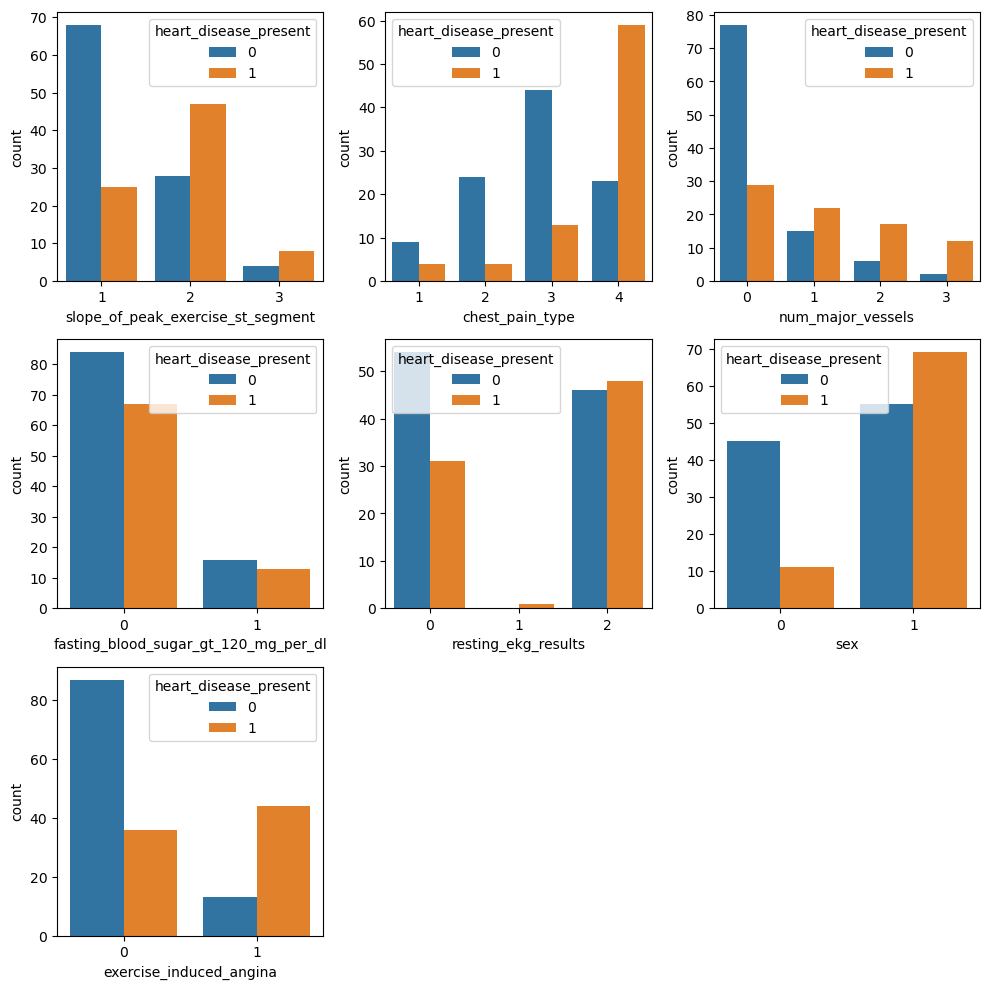

In [37]:
plt.figure(figsize=(10,10))
plot = 1

df_count=['slope_of_peak_exercise_st_segment','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results','sex','exercise_induced_angina']

for i in df_count:
    if plot<=9:
        ax = plt.subplot(3,3,plot)  
        sns.countplot(x=df[i],hue=df['heart_disease_present'])  
        plt.xlabel(i) 
    plot+=1 
plt.tight_layout() 


<Axes: xlabel='thal', ylabel='count'>

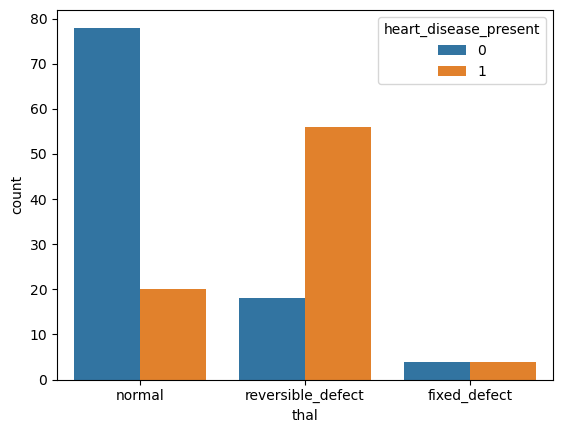

In [38]:
sns.countplot(x=df['thal'],hue=df['heart_disease_present'])

In [39]:
df.nunique()

slope_of_peak_exercise_st_segment         3
thal                                      3
resting_blood_pressure                   36
chest_pain_type                           4
num_major_vessels                         4
fasting_blood_sugar_gt_120_mg_per_dl      2
resting_ekg_results                       3
serum_cholesterol_mg_per_dl             118
oldpeak_eq_st_depression                 34
sex                                       2
age                                      40
max_heart_rate_achieved                  73
exercise_induced_angina                   2
heart_disease_present                     2
dtype: int64

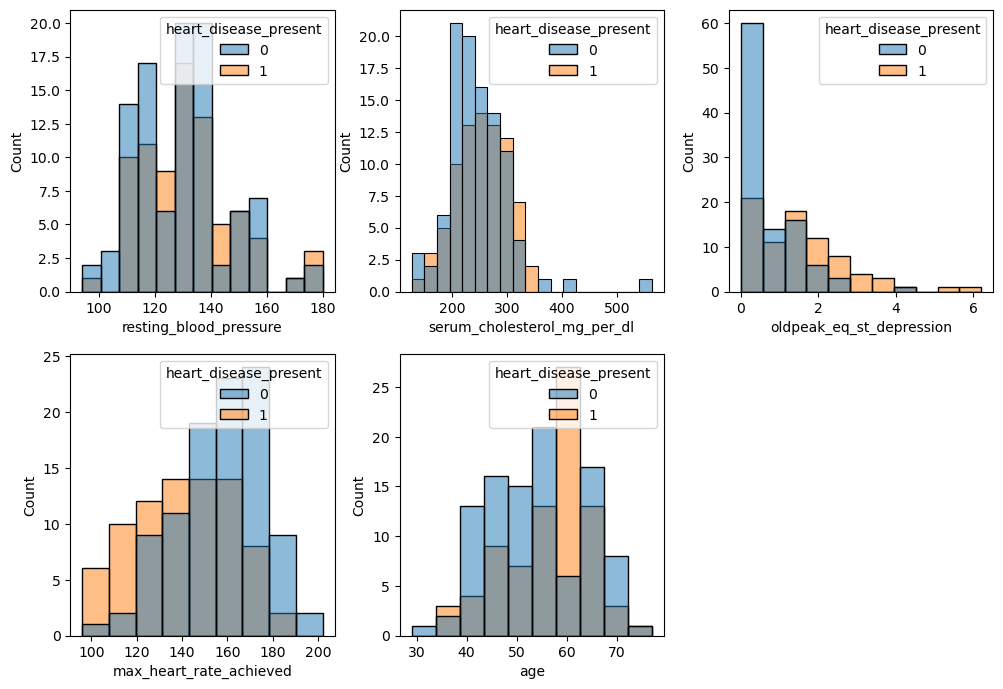

In [40]:
plt.figure(figsize=(10,10))
plot = 1

df_count=['resting_blood_pressure','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','max_heart_rate_achieved','age']

for i in df_count:
    if plot<=9:
        ax = plt.subplot(3,3,plot)  
        sns.histplot(x=df[i],hue=df['heart_disease_present'])  
        plt.xlabel(i) 
    plot+=1 
plt.tight_layout() 


<Axes: xlabel='heart_disease_present', ylabel='count'>

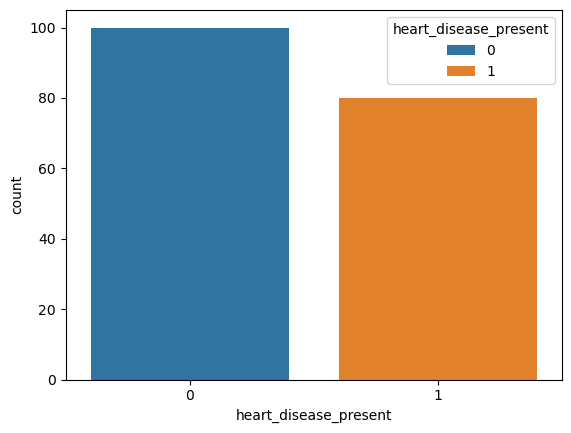

In [42]:
sns.countplot(x=df['heart_disease_present'],hue=df['heart_disease_present'])

In [45]:
df.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

<div style="background-color: #f0f8ff; color: #005f73; padding: 10px; border-radius: 5px;font-size: 40px;">
Handling Outliers</div>

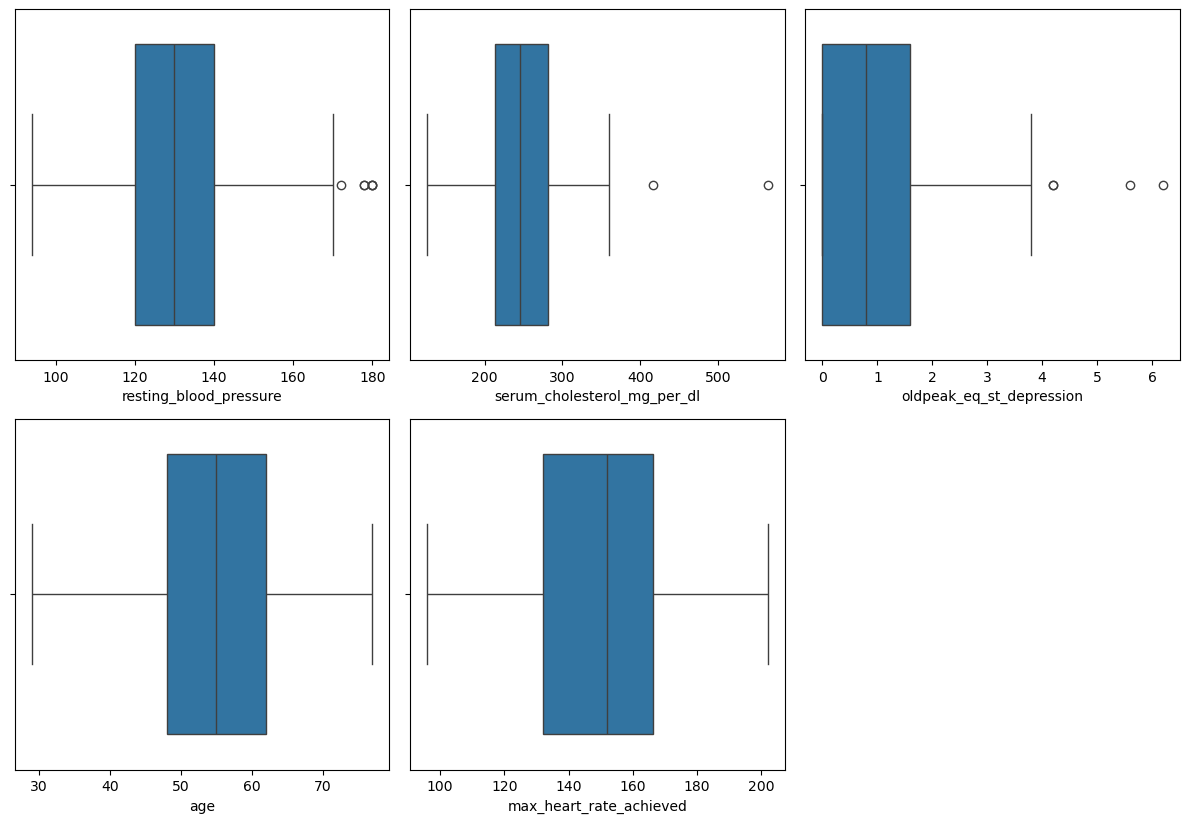

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 12))
df_outlier = [
    'resting_blood_pressure',
    'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'age',
    'max_heart_rate_achieved',
]

for plot, i in enumerate(df_outlier, start=1):
    ax = plt.subplot(3, 3, plot)  
    sns.boxplot(x=df[i], ax=ax)  
    plt.xlabel(i)

plt.tight_layout()
plt.show()


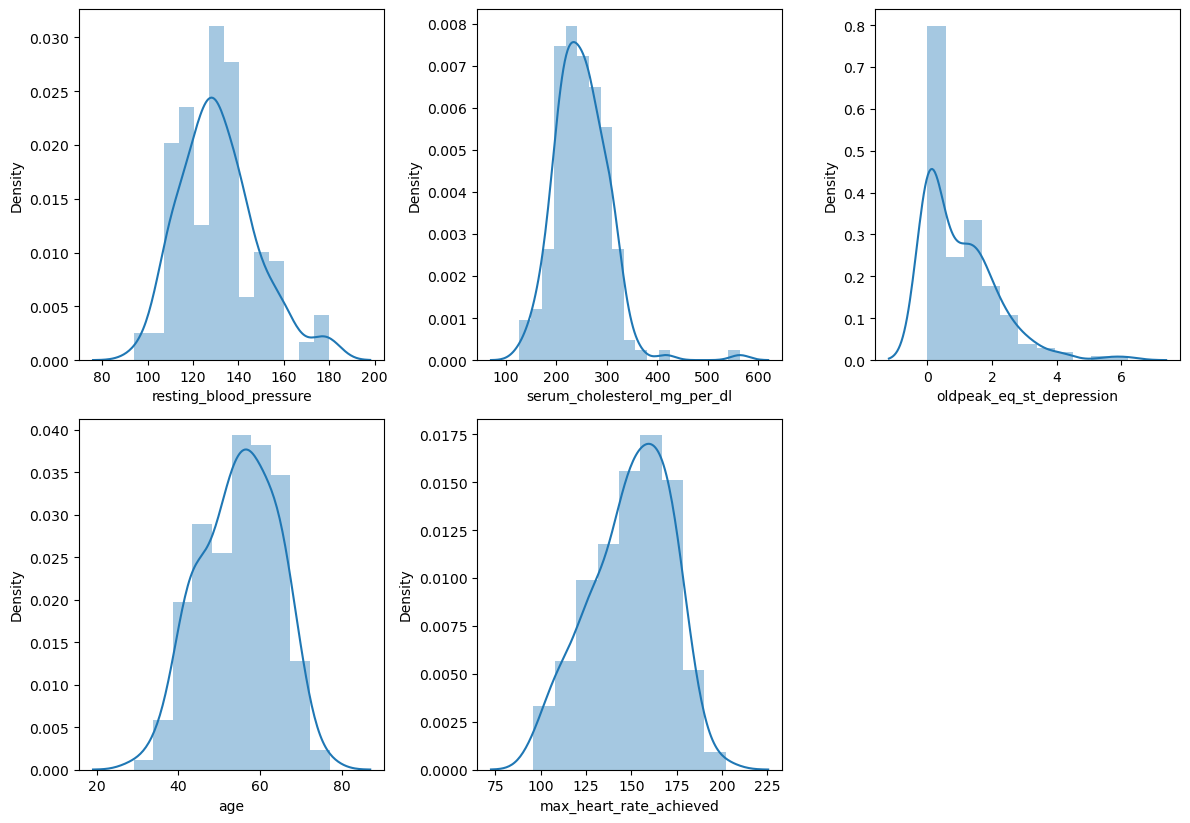

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 12))
df_outlier = [
    'resting_blood_pressure',
    'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'age',
    'max_heart_rate_achieved',
]

for plot, i in enumerate(df_outlier, start=1):
    ax = plt.subplot(3, 3, plot)  
    sns.distplot(x=df[i], ax=ax)  
    plt.xlabel(i)

plt.tight_layout()
plt.show()

In [52]:
df.nunique()

slope_of_peak_exercise_st_segment         3
thal                                      3
resting_blood_pressure                   36
chest_pain_type                           4
num_major_vessels                         4
fasting_blood_sugar_gt_120_mg_per_dl      2
resting_ekg_results                       3
serum_cholesterol_mg_per_dl             118
oldpeak_eq_st_depression                 34
sex                                       2
age                                      40
max_heart_rate_achieved                  73
exercise_induced_angina                   2
heart_disease_present                     2
dtype: int64

In [53]:
df.resting_blood_pressure.value_counts()

resting_blood_pressure
130    26
140    22
120    21
110    11
150    10
160     9
128     8
112     8
125     7
124     5
108     5
118     4
145     4
135     4
138     3
180     3
132     3
126     2
115     2
178     2
142     2
100     2
152     2
136     2
134     2
102     1
94      1
155     1
117     1
170     1
172     1
122     1
156     1
106     1
144     1
105     1
Name: count, dtype: int64

<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow:  0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid  #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li>Dealing with outliers </li>
    </ul>
</div>iv>


In [56]:
df_outlier = [
    'resting_blood_pressure',
    'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'age',
    'max_heart_rate_achieved',
]
print("Before dropping the outliers:",df.shape)

for i in df_outlier:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df = df[(df[i] >= lower) & (df[i] <= upper)]  


print("After dropping the outliers:",df.shape)
print("Outliers removed successfully.")

Before dropping the outliers: (180, 14)
After dropping the outliers: (169, 14)
Outliers removed successfully.


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow:  0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid  #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li>The dataset has been filtered to remove outliers using the Interquartile Range (IQR) method for features such as "resting_blood_pressure," "serum_cholesterol_mg_per_dl," "oldpeak_eq_st_depression," "age," and "max_heart_rate_achieved." Values outside the defined bounds (1.5 times the IQR) have been excluded, ensuring extreme values don't skew the data. Dropping outliers instead of replacing them helps preserve data integrity by avoiding artificial distortion, aligning with medical standards, and enhancing model accuracy and interpretability while reducing overfitting risk.</li>
    </ul>
</div>

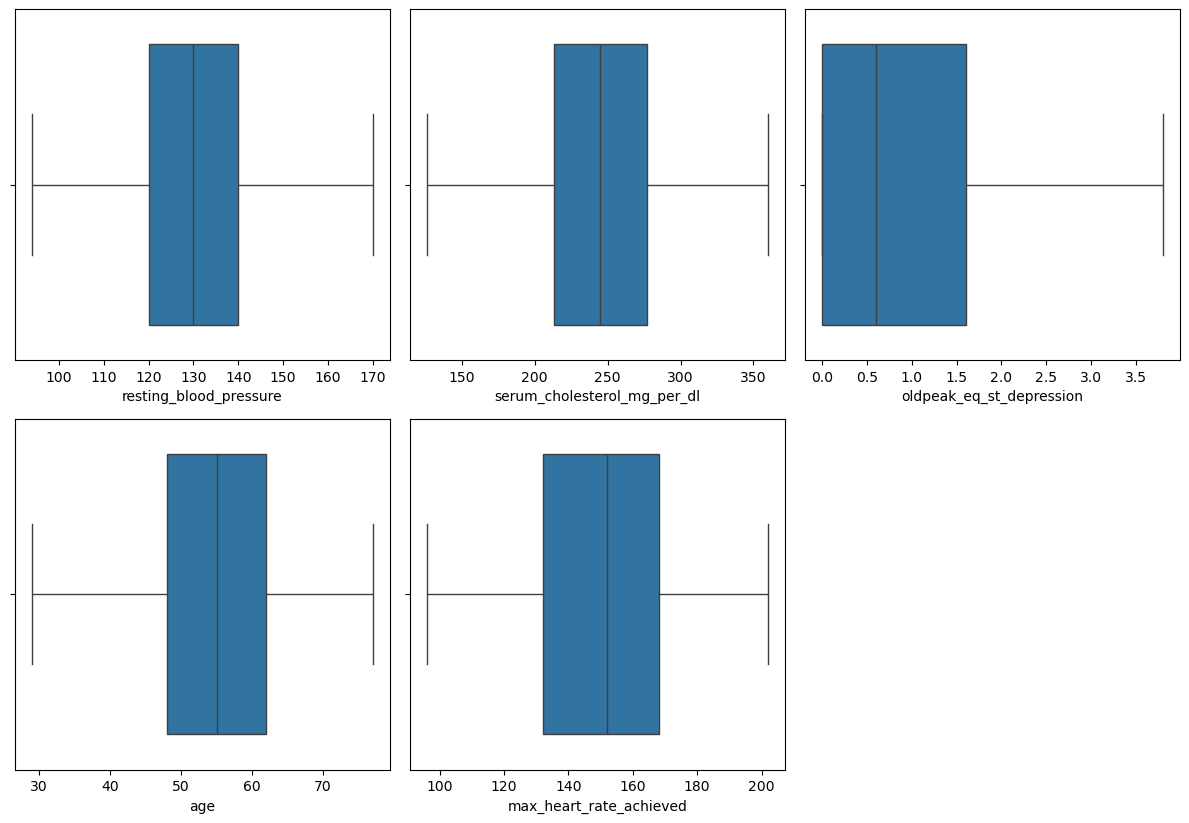

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 12))
df_outlier = [
    'resting_blood_pressure',
    'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'age',
    'max_heart_rate_achieved',
]

for plot, i in enumerate(df_outlier, start=1):
    ax = plt.subplot(3, 3, plot)  
    sns.boxplot(x=df[i], ax=ax)  
    plt.xlabel(i)

plt.tight_layout()
plt.show()


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow:  0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid  #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li>Encoding is crucial because it transforms non-numeric, categorical features into numeric values, making them ready for machine learning models, which can only work with numerical data.</li>
    </ul>
</div>

In [65]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['thal'] = label_encoder.fit_transform(df['thal'])

In [67]:
df.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
5,1,1,130,3,0,0,0,180,0.0,1,42,150,0,0


heart_disease_present                   1.000000
thal                                    0.455422
exercise_induced_angina                 0.433095
num_major_vessels                       0.417095
chest_pain_type                         0.400550
oldpeak_eq_st_depression                0.386576
sex                                     0.363046
slope_of_peak_exercise_st_segment       0.329136
resting_ekg_results                     0.167919
serum_cholesterol_mg_per_dl             0.158959
age                                     0.144703
resting_blood_pressure                  0.055380
fasting_blood_sugar_gt_120_mg_per_dl    0.001789
max_heart_rate_achieved                -0.363598
Name: heart_disease_present, dtype: float64


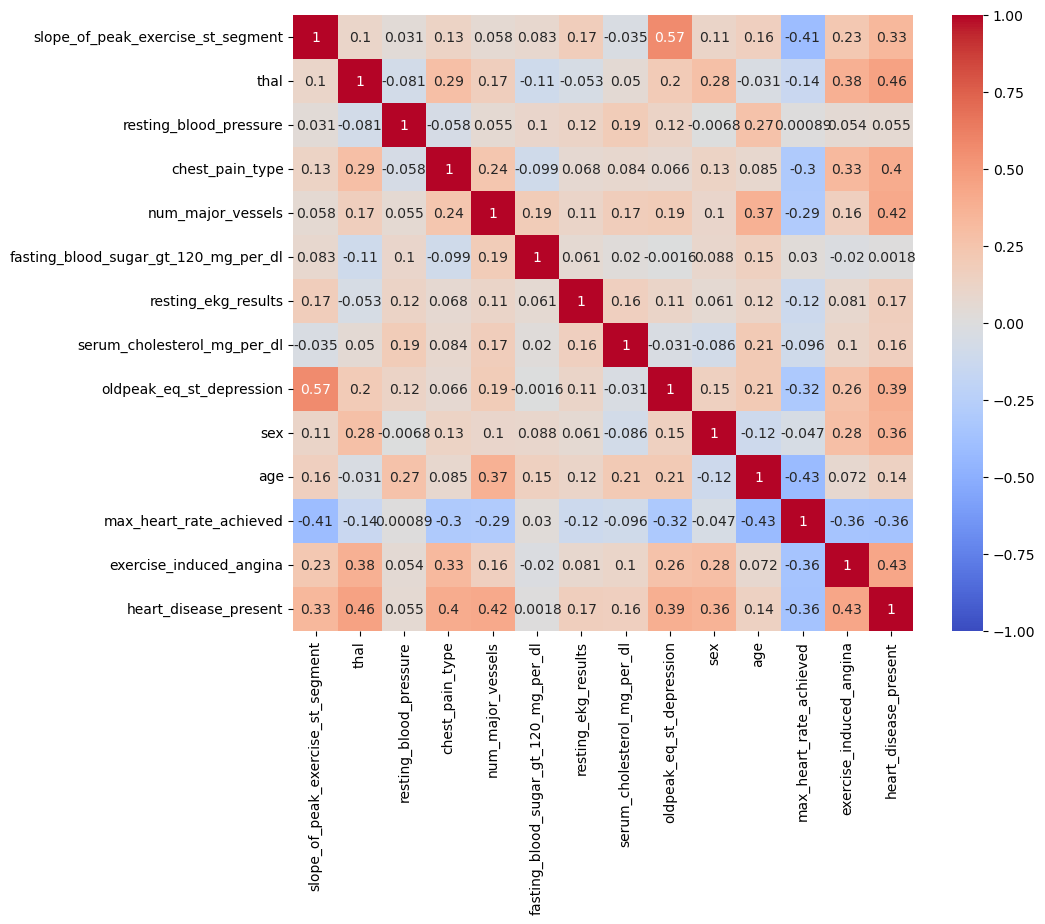

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df.corr()['heart_disease_present'].sort_values(ascending=False))

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.show()


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow:  0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li><strong>Columns with Low or Near-Zero Correlation:</strong>
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>fasting_blood_sugar_gt_120_mg_per_dl (0.001789): This has an almost zero correlation with 'heart_disease_present', so it can be safely removed.</li>
                <li>max_heart_rate_achieved (-0.363598): While negative, the correlation is still relatively weak and may not contribute much to prediction performance. Removing this may have some negative impact on the model, so it's better not to remove this column.</li>
            </ul>
        </li>
    </ul>
</div>


In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df.drop(columns=['heart_disease_present']) 

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))

                                 Feature        VIF
2                 resting_blood_pressure  80.445718
10                                   age  42.818398
11               max_heart_rate_achieved  39.621360
7            serum_cholesterol_mg_per_dl  33.786911
3                        chest_pain_type  14.446720
0      slope_of_peak_exercise_st_segment  11.442129
1                                   thal   8.728814
9                                    sex   4.041422
8               oldpeak_eq_st_depression   3.219691
6                    resting_ekg_results   2.302369
4                      num_major_vessels   2.095063
12               exercise_induced_angina   2.082623
5   fasting_blood_sugar_gt_120_mg_per_dl   1.323931


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow:  0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li><strong>High VIF (VIF > 10):</strong> These features have very high multicollinearity and are redundant with other features.
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>resting_blood_pressure (VIF = 80.45)</li>
                <li>serum_cholesterol_mg_per_dl (VIF = 33.79)</li>
                <li>age (VIF = 42.82)</li>
                <li>max_heart_rate_achieved (VIF = 39.62)</li>
            </ul>
        </li>
        <li><strong>Moderate VIF (VIF > 5 but <= 10):</strong> These features also have high multicollinearity, but they might still carry valuable information, so you may want to keep them if they improve model performance.
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>chest_pain_type (VIF = 14.45)</li>
                <li>slope_of_peak_exercise_st_segment (VIF = 11.44)</li>
                <li>thal (VIF = 8.73)</li>
            </ul>
        </li>
        <li><strong>Low VIF (VIF <= 5):</strong> These features have low multicollinearity and should generally be safe to keep.
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>sex (VIF = 4.04)</li>
                <li>oldpeak_eq_st_depression (VIF = 3.22)</li>
                <li>resting_ekg_results (VIF = 2.30)</li>
                <li>exercise_induced_angina (VIF = 2.08)</li>
                <li>num_major_vessels (VIF = 2.10)</li>
                <li>fasting_blood_sugar_gt_120_mg_per_dl (VIF = 1.32)</li>
            </ul>
        </li>
    </ul>
</div>
 </li>
    </ul>
</div>
>


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow:  0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid  #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li><strong>resting_blood_pressure (VIF = 80.45, correlation = 0.055380):</strong> 
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Reason: Extremely high VIF and very weak correlation with the target. It causes significant multicollinearity and removing it reduces redundancy without losing valuable information.</li>
            </ul>
        </li>
        <li><strong>serum_cholesterol_mg_per_dl (VIF = 33.79, correlation = 0.158959):</strong>
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Reason: High VIF and weak correlation with the target. The high multicollinearity suggests it overlaps with other features and doesn’t add unique predictive power.</li>
            </ul>
        </li>
        <li><strong>age (VIF = 42.82, correlation = 0.144703):</strong>
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Reason: High VIF and weak correlation with the target. It might be redundant with other features, and its high multicollinearity makes it less useful.</li>
            </ul>
        </li>
        <li><strong>max_heart_rate_achieved (VIF = 39.62, correlation = -0.363598):</strong>
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Reason: High VIF and moderate negative correlation with the target. Although it has some predictive value, the high multicollinearity with other features may cause issues, and its negative correlation suggests it might not add much to the model’s performance.</li>
            </ul>
        </li>
        <li><strong>fasting_blood_sugar_gt_120_mg_per_dl (VIF = 1.33, correlation = 0.001789):</strong>
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Reason: Very weak correlation with the target variable, indicating minimal contribution to the model's predictive power. It can be safely removed.</li>
            </ul>
        </li>
    </ul>
</div>
   </li>
    </ul>
</div>
   </li>
    </ul>
</div>


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <h2 style="color: #1565c0; margin-bottom: 20px;">Will VIFs Work for All Models?</h2>
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li><strong>Logistic Regression:</strong> 
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>VIF is crucial for logistic regression. Removing multicollinearity helps stabilize the model and prevent overfitting.</li>
            </ul>
        </li>
        <li><strong>Random Forest / XGBoost:</strong> 
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>VIF works here but is not as critical. These models are relatively resistant to multicollinearity, but checking feature importance can still be helpful for feature selection.</li>
            </ul>
        </li>
        <li><strong>Support Vector Machine (SVM):</strong> 
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>VIF is important for SVM. These models can struggle with multicollinearity, so reducing it improves the model’s performance.</li>
            </ul>
        </li>
        <li><strong>K-Nearest Neighbors (KNN):</strong> 
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>VIF can help, but standardizing numerical features is more critical for KNN, as it is based on distance metrics.</li>
            </ul>
        </li>
        <li><strong>Neural Networks:</strong> 
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>VIF is less critical here. Deep models are capable of handling high-dimensional data, so feature selection may not be as impactful. However, reducing features can still improve performance and computational efficiency.</li>
            </ul>
        </li>
    </ul>
</div>
div>
    </li>
    </ul>
</div>


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow:  0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <h2 style="color: #1565c0; margin-bottom: 20px;">Model Overview</h2>
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li><strong>Logistic Regression:</strong>
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>A simple and interpretable model, great for binary classification.</li>
            </ul>
        </li>
        <li><strong>Random Forest:</strong>
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Robust to overfitting and works well with complex data, often provides good performance out of the box.</li>
            </ul>
        </li>
        <li><strong>Support Vector Machine (SVM):</strong>
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Effective in high-dimensional spaces, especially if you have a non-linear decision boundary.</li>
            </ul>
        </li>
        <li><strong>Gradient Boosting Machines (GBM):</strong>
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Models like XGBoost, LightGBM, or CatBoost are often top performers in classification tasks due to their accuracy and speed.</li>
            </ul>
        </li>
        <li><strong>K-Nearest Neighbors (KNN):</strong>
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Simple but effective for some cases, especially when decision boundaries are non-linear.</li>
            </ul>
        </li>
        <li><strong>Neural Networks (if appropriate):</strong>
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Can capture complex relationships in the data, but may require more data and computation.</li>
            </ul>
        </li>
    </ul>
</div>
iv>

        </li>
    </ul>
</div>


In [78]:
features = df[['thal', 'exercise_induced_angina', 'num_major_vessels', 
               'chest_pain_type', 'oldpeak_eq_st_depression', 'sex', 
               'resting_ekg_results', 'slope_of_peak_exercise_st_segment']]

x = features
y = df[['heart_disease_present']]

In [80]:
x

,thal,exercise_induced_angina,num_major_vessels,chest_pain_type,oldpeak_eq_st_depression,sex,resting_ekg_results,slope_of_peak_exercise_st_segment
0,1,0,0,2,0.0,1,2,1
1,1,0,0,3,1.6,0,0,2
2,1,1,3,4,0.0,1,2,1
3,2,0,0,4,0.0,1,0,1
5,1,0,0,3,0.0,1,0,1
...,...,...,...,...,...,...,...,...
174,1,0,0,4,1.2,1,0,1
175,2,0,2,4,0.2,1,0,2
177,2,1,0,3,1.8,1,0,2
178,1,0,2,3,0.0,1,0,1


In [82]:
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.30,random_state=2)

In [84]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [86]:
y.value_counts()

heart_disease_present
0                        95
1                        74
Name: count, dtype: int64

<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid  #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li>SMOTE is not necessary in this case. The class distribution (95:74) is relatively balanced, so oversampling may not provide significant benefits and could even introduce noise. You can proceed without it.</li>
    </ul>
</div>
iv>


<div style="background-color: #f0f8ff; color: #005f73; padding: 10px; border-radius: 5px;font-size: 40px;">
Model Building</div>


<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* LogisticRegression *
</div>


In [91]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [93]:
y_predLR = model.predict(x_test)
y_predLR_train = model.predict(x_train)

In [95]:
accuracy = accuracy_score(y_test, y_predLR) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_predLR_train) * 100
print(round(accuracy, 2))

78.43
87.29


In [97]:
print(classification_report(y_test,y_predLR))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        28
           1       0.80      0.70      0.74        23

    accuracy                           0.78        51
   macro avg       0.79      0.78      0.78        51
weighted avg       0.79      0.78      0.78        51



In [99]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_predLR) * 100
roc_auc

77.63975155279503

<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* Hyperparameter Tuning using GridSearchCV(LogisticRegression) *</div>

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  
    'solver': ['saga', 'liblinear'],  
    'max_iter': [100, 200, 500],
    'class_weight': ['balanced'],
    'tol': [1e-4, 1e-3],
    'intercept_scaling': [1, 2]
}

grid_search = GridSearchCV(log_reg, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'],
                         'intercept_scaling': [1, 2],
                         'max_iter': [100, 200, 500], 'penalty': ['l1', 'l2'],
                         'solver': ['saga', 'liblinear'],
                         'tol': [0.0001, 0.001]},
             verbose=1)

In [103]:
best_params = grid_search.best_params_

In [104]:
model1 = LogisticRegression(**best_params)
model1.fit(x_train, y_train)

LogisticRegression(C=0.001, class_weight='balanced', solver='saga')

In [105]:
y_predLR_T = model1.predict(x_test)
y_predLR_T_train = model1.predict(x_train)

In [106]:
accuracy = accuracy_score(y_test, y_predLR_T) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_predLR_T_train) * 100
print(round(accuracy, 2))

82.35
83.9


In [112]:
print(classification_report(y_test,y_predLR_T))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.85      0.74      0.79        23

    accuracy                           0.82        51
   macro avg       0.83      0.82      0.82        51
weighted avg       0.83      0.82      0.82        51



In [114]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_predLR_T) * 100
roc_auc

81.59937888198758

<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* RandomForest *</div>

In [117]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
model_rf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [118]:
y_predRF = model_rf.predict(x_test)   
y_predRF_train = model_rf.predict(x_train)   

In [121]:
accuracy = accuracy_score(y_test, y_predLR_T) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_predRF_train) * 100
print(round(accuracy, 2))

82.35
97.46


In [123]:
print(classification_report(y_test,y_predRF))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        28
           1       0.80      0.70      0.74        23

    accuracy                           0.78        51
   macro avg       0.79      0.78      0.78        51
weighted avg       0.79      0.78      0.78        51



In [125]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_predRF) * 100
roc_auc

77.63975155279503

<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* Hyperparameter Tuning using RandomForest *</div>

In [128]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

param_grid = {
    'n_estimators': [100, 200, 400, 600, 800, 1000, 1200],  
    'max_features': ['auto', 'sqrt', 'log2'],  
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80],  
    'min_samples_split': [2, 3, 5, 10],  
    'min_samples_leaf': [1, 2, 4, 5], 
    'bootstrap': [True, False]  
}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=param_grid,
    n_iter=50, 
    cv=5,  
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rf_cv.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 5],
                                        'min_samples_split': [2, 3, 5, 10],
                                        'n_estimators': [100, 200, 400, 600,
                                                         800, 1000, 1200]},
                   random_state=42, verbose=2)

In [130]:
best_params=rf_cv.best_params_

In [132]:
rf_clf2 = RandomForestClassifier(**best_params)
rf_clf2.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=5)

In [134]:
y_predRF_T=rf_clf2.predict(x_test)   
y_predRF_T_train=rf_clf2.predict(x_train)   

In [136]:
accuracy = accuracy_score(y_test, y_predRF_T) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_predRF_train) * 100
print(round(accuracy, 2))

84.31
97.46


In [138]:
print(classification_report(y_test,y_predRF_T))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87        28
           1       0.94      0.70      0.80        23

    accuracy                           0.84        51
   macro avg       0.87      0.83      0.84        51
weighted avg       0.86      0.84      0.84        51



<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* SVC *</div>

In [141]:
from sklearn.svm import SVC  
svclassifier = SVC() 
svclassifier.fit(x_train, y_train) 

SVC()

In [143]:
y_pred=svclassifier.predict(x_test)
y_pred_train=svclassifier.predict(x_train)

In [145]:
accuracy = accuracy_score(y_test, y_pred) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_pred_train) * 100
print(round(accuracy, 2))

86.27
92.37


In [147]:
print(classification_report(y_test,y_pred))  

              precision    recall  f1-score   support

           0       0.82      0.96      0.89        28
           1       0.94      0.74      0.83        23

    accuracy                           0.86        51
   macro avg       0.88      0.85      0.86        51
weighted avg       0.88      0.86      0.86        51



<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* Hyperparameter Tuning using SVC *</div>

In [5486]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'C': [0.1, 5, 10, 50, 60, 70],
        'kernel': ['linear'],
        'gamma': ['scale', 'auto']
    },
    {
        'C': [0.1, 5, 10, 50, 60, 70],
        'kernel': ['rbf'],
        'gamma': ['scale', 'auto']
    },
    {
        'C': [0.1, 5, 10, 50, 60, 70],
        'kernel': ['poly'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4]
    }
]

model = SVC()

grid = GridSearchCV(model, param_grid=param_grid, refit=True, verbose=2, scoring='f1', cv=5)

grid.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ....................C=5, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=5, gamma=scale, 

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.1, 5, 10, 50, 60, 70],
                          'gamma': ['scale', 'auto'], 'kernel': ['linear']},
                         {'C': [0.1, 5, 10, 50, 60, 70],
                          'gamma': ['scale', 'auto'], 'kernel': ['rbf']},
                         {'C': [0.1, 5, 10, 50, 60, 70], 'degree': [2, 3, 4],
                          'gamma': ['scale', 'auto'], 'kernel': ['poly']}],
             scoring='f1', verbose=2)

In [5487]:
best_params=grid.best_params_

In [5488]:
model1 = SVC(**best_params)
model1.fit(x_train,y_train)

SVC(C=5, kernel='linear')

In [5492]:
y_hat=model1.predict(x_test)
y_hat_train=model1.predict(x_train)

In [5494]:
accuracy = accuracy_score(y_test, y_hat) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_hat_train) * 100
print(round(accuracy, 2))

80.39
84.75


In [5498]:
print(classification_report(y_test,y_hat))  

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        28
           1       0.84      0.70      0.76        23

    accuracy                           0.80        51
   macro avg       0.81      0.79      0.80        51
weighted avg       0.81      0.80      0.80        51



In [5500]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_hat) * 100
roc_auc

79.42546583850931

<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* xgboost *</div>

In [5503]:
from xgboost import XGBClassifier
xgb_r=XGBClassifier() 
xgb_r.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [5505]:
y_predXGB =xgb_r.predict(x_test)
y_predXGB_train =xgb_r.predict(x_train)

In [5507]:
accuracy = accuracy_score(y_test, y_predXGB) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_predXGB_train) * 100
print(round(accuracy, 2))

82.35
94.92


In [5509]:
print(classification_report(y_test,y_predXGB))  

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.85      0.74      0.79        23

    accuracy                           0.82        51
   macro avg       0.83      0.82      0.82        51
weighted avg       0.83      0.82      0.82        51



<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* Hyperparameter Tunning of XGBoost *</div>

In [5512]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4],
              'learning_rate': [0.01, 0.03, 0.06, 0.1],
              'max_depth': [5,6,7,8,9],
              'n_estimators': [50,65,80],
              'reg_alpha': [0,0.1,0.2,0.4],
              'reg_lambda': [0,0.1,0.2]}

XGB = XGBClassifier(random_state=42,verbosity=0,silent=0) 

rcv = RandomizedSearchCV(estimator=XGB, scoring='accuracy',param_distributions=param_grid,
                        n_iter=100, cv=3,verbose=2, random_state=42, n_jobs=-1)
                        
rcv.fit(x_train,y_train)
cv_best_params = rcv.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [5513]:
XGB_T=XGBClassifier(**cv_best_params)
XGB_T.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.06, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=65, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [5516]:
y_predXGB_T =XGB_T.predict(x_test)
y_predXGB_T_train =XGB_T.predict(x_train)

In [5518]:
accuracy = accuracy_score(y_test, y_predXGB_T) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_predXGB_T_train) * 100
print(round(accuracy, 2))

82.35
92.37


In [5520]:
print(classification_report(y_test,y_predXGB))  

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.85      0.74      0.79        23

    accuracy                           0.82        51
   macro avg       0.83      0.82      0.82        51
weighted avg       0.83      0.82      0.82        51



<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* KNN *</div>

In [5545]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [5547]:
y_pred_knn =knn.predict(x_test)
y_pred_knn_train =knn.predict(x_train)

In [5549]:
accuracy = accuracy_score(y_test, y_pred_knn) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_pred_knn_train) * 100
print(round(accuracy, 2))

84.31
83.9


In [5551]:
print(classification_report(y_test,y_pred_knn))  

              precision    recall  f1-score   support

           0       0.79      0.96      0.87        28
           1       0.94      0.70      0.80        23

    accuracy                           0.84        51
   macro avg       0.87      0.83      0.84        51
weighted avg       0.86      0.84      0.84        51



<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* Hyperparameter Tunning of KNN *</div>

In [5601]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [5603]:
best_params=grid_search.best_params_

In [5605]:
KNN_T=KNeighborsClassifier(**best_params)
KNN_T.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              n_neighbors=9, num_parallel_tree=None, ...)

In [5607]:
y_pred_knn_t =KNN_T.predict(x_test)
y_pred_knn_t_train =KNN_T.predict(x_train)

In [5609]:
accuracy = accuracy_score(y_test, y_pred_knn_t) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_pred_knn_t_train) * 100
print(round(accuracy, 2))

82.35
94.92


In [5611]:
print(classification_report(y_test,y_pred_knn_t))  

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.85      0.74      0.79        23

    accuracy                           0.82        51
   macro avg       0.83      0.82      0.82        51
weighted avg       0.83      0.82      0.82        51



<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* Neural Network *</div>

In [5567]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state=42)
model.fit(x_train, y_train)

MLPClassifier(random_state=42)

In [5569]:
y_pred_nn =model.predict(x_test)
y_pred_nn_train =model.predict(x_train)

In [5571]:
accuracy = accuracy_score(y_test, y_pred_nn) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_pred_nn_train) * 100
print(round(accuracy, 2))

86.27
94.07


In [5573]:
print(classification_report(y_test,y_pred_nn))  

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        28
           1       0.90      0.78      0.84        23

    accuracy                           0.86        51
   macro avg       0.87      0.86      0.86        51
weighted avg       0.87      0.86      0.86        51



<div style="background: linear-gradient(135deg, #f3f3f3, #e6e6e6); color: #333333; padding: 20px; border-radius: 15px; font-size: 20px; border: 4px solid; border-image: linear-gradient(to right, #ff7e5f, #feb47b) 1; text-align: center; font-weight: bold; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
REPORT</div>



<table style="width: 100%; border-collapse: collapse; text-align: center;">
    <tr style="background: linear-gradient(135deg, #fff1e6, #ffcccb); color: #2f4f4f; padding: 18px; font-size: 26px; border: 4px solid #ff6347; font-weight: bold; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2);">
        <th colspan="2">Model Performance: Test & Train Accuracy</th>
    </tr>
    <tr>
        <td style="padding: 18px; border: 4px solid #ff6347;">
            <strong>Logistic Regression (Without Tuning):</strong><br> 
            Test Accuracy = 78.43% <br> 
            Train Accuracy = 87.29%
        </td>
        <td style="padding: 18px; border: 4px solid #ff6347;">
            <strong>Logistic Regression (After Tuning):</strong><br> 
            Test Accuracy = 82.35% <br> 
            Train Accuracy = 83.9%
        </td>
    </tr>
    <tr>
        <td style="padding: 18px; border: 4px solid #ff6347;">
            <strong>Random Forest (Without Tuning):</strong><br> 
            Test Accuracy = 82.35% <br> 
            Train Accuracy = 97.46%
        </td>
        <td style="padding: 18px; border: 4px solid #ff6347;">
            <strong>Random Forest (After Tuning):</strong><br> 
            Test Accuracy = 84.31% <br> 
            Train Accuracy = 97.46%
        </td>
    </tr>
    <tr>
        <td style="padding: 18px; border: 4px solid #ff6347;">
            <strong>XGBoost (Without Tuning):</strong><br> 
            Test Accuracy = 82.35% <br> 
            Train Accuracy = 94.92%
        </td>
        <td style="padding: 18px; border: 4px solid #ff6347;">
            <strong>XGBoost (After Tuning):</strong><br> 
            Test Accuracy = 82.35% <br> 
            Train Accuracy = 92.37%
        </td>
    </tr>
    <tr>
        <td style="padding: 18px; border: 4px solid #ff6347;">
            <strong>KNN (Without Tuning):</strong><br> 
            Test Accuracy = 84.31% <br> 
            Train Accuracy = 83.9%
        </td>
        <td style="padding: 18px; border: 4px solid #ff6347;">
            <strong>KNN (After Tuning):</strong><br> 
            Test Accuracy = 82.35% <br> 
            Train Accuracy = 94.92%
        </td>
    </tr>
    <tr>
        <td style="padding: 18px; border: 4px solid #ff6347;">
            <strong>Neural Networks (Without Tuning):</strong><br> 
            Test Accuracy = 86.27% <br> 
            Train Accuracy = 94.07%
        </td>
        <td style="padding: 18px; border: 4px solid #ff6347;">
            <strong>Neural Networks (After Tuning):</strong><br> 
            Test Accuracy = 82.35% <br> 
            Train Accuracy = 83.9%
        </td>
    </tr>
    <tr>
        <td style="padding: 18px; border: 4px solid #ff6347;">
            <strong>SVC (Without Tuning):</strong><br> 
            Test Accuracy = 86.27% <br> 
            Train Accuracy = 92.37%
        </td>
        <td style="padding: 18px; border: 4px solid #ff6347;">
            <strong>SVC (After Tuning):</strong><br> 
            Test Accuracy = 80.39% <br> 
            Train Accuracy = 84.75%
        </td>
    </tr>
</table>


<div style="background: linear-gradient(135deg, #fff1e6, #ffcccb); color: #2f4f4f; padding: 18px; border-radius: 20px; font-size: 26px; border: 4px solid #ff6347; text-align: center; font-weight: bold; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2);">
  Support Vector Classifier (SVC) appears to be the best model overall for the dataset.<br>
  With a Test Accuracy = 86.27%, Train Accuracy = 92.37%.<br>
  It performs consistently well across all the key metrics.
</div>



<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <strong>Good Alternatives:</strong>
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li>Neural Networks exhibit the highest accuracy (86.27%) on the test set, along with a good balance across precision, recall, and F1-scores.</li>
    </ul>

div>


<div style="background-color: #e3f2fd; color: #01579b; padding: 15px; font-size: 28px; font-weight: bold; text-align: center; border-radius: 10px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
    Why Support Vector Classifier (SVC)?
</div>


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow:  0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid  #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li>Test Accuracy higher than most other models</li>
        <li>Train Accuracy relatively high, though not as high as Random Forest, indicating generalization capability is good
</li>
        <li>Precision for Class 1 indicating it performs well in detecting positive cases of heart disease</li>
        <li>Recall for Class 0 showing it does well in identifying negative cases as well</li>
        <li> SVC handles non-linear relationships well, making it ideal for your dataset with potentially correlated features.</li>
        <li> SVC can perform well even with correlated features, finding an optimal separating hyperplane.</li>
    </ul>
</div>

<div style="background-color: #e3f2fd; color: #01579b; padding: 15px; font-size: 28px; font-weight: bold; text-align: center; border-radius: 10px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
   The tuned SVC performed not well than untunned because:
</div>


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow:  0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid  #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li>The tuning made the model more complex, which led to overfitting on the training data, making it unable to generalize well to unseen test data.</li>
        <li>The tuned parameters (like C and gamma) may not have been the best fit for the dataset, causing the model to perform suboptimally.
</li>
        <li>Tuning increased the model's complexity, which is sometimes detrimental, especially when the simpler, default settings would have been sufficient for the data.</li>
        <li>The adjustments during tuning might have disrupted the balance between bias and variance, leading to worse overall performance on the test set.</li>
    </ul>
</div>

<div style="background-color: #e3f2fd; color: #01579b; padding: 15px; font-size: 28px; font-weight: bold; text-align: center; border-radius: 10px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
   Why Not the Other Models?
</div>


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow:  0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li><strong>Logistic Regression:</strong>
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Good performance with 78.43% test accuracy but outperformed by SVC, Random Forest, and KNN in precision and recall for class 1.</li>
            </ul>
        </li>
        <li><strong>Random Forest:</strong>
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Excellent training accuracy (97.46%) but test accuracy of 82.35%, indicating overfitting. Precision and recall for class 1 are slightly lower than SVC.</li>
            </ul>
        </li>
        <li><strong>XGBoost:</strong>
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Similar to Random Forest in performance, but lacks the consistency of SVC. Precision is good, but recall for class 0 is weaker.</li>
            </ul>
        </li>
        <li><strong>KNN:</strong>
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Test accuracy of 84.31%, but doesn't outperform SVC in precision and recall for class 1.</li>
            </ul>
        </li>
        <li><strong>Neural Networks:</strong>
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Good test accuracy (86.27%) but some overfitting with a higher training accuracy. Recall for class 0 is strong, but precision for class 1 is slightly lower than SVC.</li>
            </ul>
        </li>
    </ul>
</div>


<div style="background: linear-gradient(135deg, #f3f3f3, #e6e6e6); color: #333333; padding: 20px; border-radius: 15px; font-size: 20px; border: 4px solid; border-image: linear-gradient(to right, #ff7e5f, #feb47b) 1; text-align: center; font-weight: bold; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
Suggestions to the Hospital  to awake the predictions of heart diseases  prevent life threats.</div>


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li><strong>Data Collection & Integration:</strong> Standardized and structured data improves prediction accuracy.
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Approach:
                    <ul style="list-style-type: square; margin-left: 20px;">
                        <li>Ensure interoperability between hospital systems for better data sharing.</li>
                        <li>Include social and lifestyle factors in patient records.</li>
                    </ul>
                </li>
            </ul>
        </li>
        <li><strong>Preventive Screening & Early Diagnosis:</strong> Regular checkups reduce life-threatening risks.
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Approach:
                    <ul style="list-style-type: square; margin-left: 20px;">
                        <li>Conduct regular ECG, lipid tests, and AI-powered imaging.</li>
                        <li>Use risk stratification models for early detection.</li>
                    </ul>
                </li>
            </ul>
        </li>
        <li><strong>Lifestyle-Based Interventions:</strong> Personalized health plans can prevent heart disease.
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Approach:
                    <ul style="list-style-type: square; margin-left: 20px;">
                        <li>Promote diet and exercise plans based on patient history.</li>
                        <li>Implement remote monitoring with smart health devices.</li>
                        <li>Conduct heart health awareness programs in the community.</li>
                    </ul>
                </li>
            </ul>
        </li>
        <li><strong>Genetic & Biomarker-Based Risk Assessments:</strong> Identifying risks at the genetic level.
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Approach:
                    <ul style="list-style-type: square; margin-left: 20px;">
                        <li>Implement genetic testing for high-risk individuals.</li>
                        <li>Use biomarkers (e.g., Troponin, BNP) for heart failure prediction.</li>
                    </ul>
                </li>
            </ul>
        </li>
        <li><strong>Training & Awareness Programs:</strong> Educating both healthcare professionals and patients.
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Approach:
                    <ul style="list-style-type: square; margin-left: 20px;">
                        <li>Train doctors on AI-based diagnostics.</li>
                        <li>Educate the public on early heart disease symptoms.</li>
                        <li>Use mobile apps for patient self-monitoring.</li>
                    </ul>
                </li>
            </ul>
        </li>
    </ul>
</div>

<div style="background-color: #e3f2fd; color: #01579b; padding: 15px; font-size: 28px; font-weight: bold; text-align: center; border-radius: 10px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
    Issues and Approaches
</div>

<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li><strong>Outliers:</strong>Outliers can skew model results and reduce accuracy.
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Approach: Remove outliers using the IQR method:
                    <ul style="list-style-type: square; margin-left: 20px;">
                        <li>Calculate Q1, Q3, and IQR.</li>
                        <li>Set lower and upper bounds (Q1 - 1.5*IQR, Q3 + 1.5*IQR).</li>
                        <li>Filter out values outside these bounds.</li>
                    </ul>
                </li>
            </ul>
        </li>
        <li><strong>Feature Engineering:</strong>Feature selection is crucial, but there may still be room for improvement in how the features represent the underlying data, potentially affecting the model’s accuracy.
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Approach: Applied Variance Inflation Factor (VIF) and correlation analysis to identify and remove collinear features, optimizing the feature set for better model performance.</li>
            </ul>
        </li>
        <li><strong>Overfitting:</strong>Several models (e.g., Random Forest, Neural Networks) showed overfitting, with high training accuracy but lower test accuracy.
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Approach: 
                    <ul style="list-style-type: square; margin-left: 20px;">
                        <li>Cross-validation to ensure that models generalize well across different data splits.</li>
                        <li>Regularization techniques (L1/L2) can help prevent models from becoming too complex and overfitting.</li>
                        <li>Pruning decision trees in models like Random Forest to prevent overfitting.</li>
                    </ul>
                </li>
            </ul>
        </li>
        <li><strong>Precision vs Recall:</strong>Some models, such as Neural Networks, showed high recall for class 0 but lower precision for class 1 (heart disease cases), which is critical in healthcare to reduce false positives.
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Approach:
                    <ul style="list-style-type: square; margin-left: 20px;">
                        <li>Optimize the precision-recall tradeoff by adjusting the decision threshold in classification models.</li>
                        <li>Use precision-recall curves and F1-score as evaluation metrics, especially when false positives are costly.</li>
                    </ul>
                </li>
            </ul>
        </li>
    </ul>
</div>


<div style="background: radial-gradient(circle, #84fab0, #8fd3f4); color: #2c3e50; padding: 20px; border-radius: 15px; font-size: 30px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2); text-align: center; border: 1px solid #2c3e50;">
    --END--
</div>